In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## FOCUS
What are the columns that determines employee retention

In [4]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [5]:
left = df[df.left==1]
left.shape

(3571, 10)

In [6]:
3571+11428

14999

#### Finding mean of each columns

In [7]:
df.groupby('left').mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_9280\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

1 **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

2 **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

3 **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

**Impact of salary on employee retention**

<Axes: xlabel='salary'>

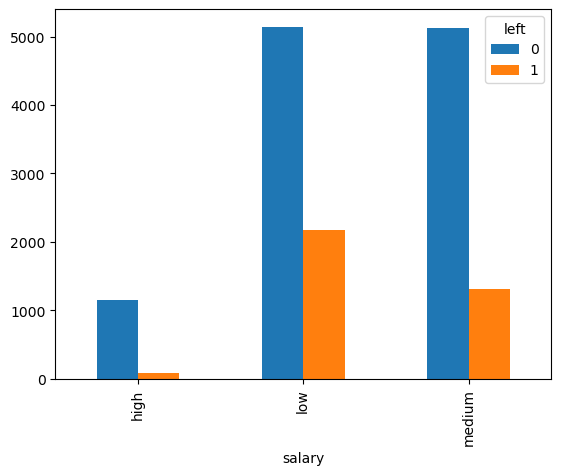

In [8]:
pd.crosstab(df['salary'], df['left']).plot(kind='bar', stacked=False)

From the above graph we could notice that employees with high salary are not likely to leave 

**Impact of Department on employee retention**

<Axes: xlabel='Department'>

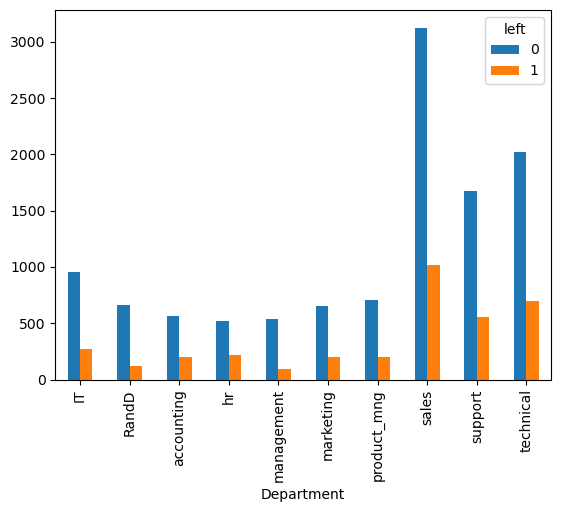

In [9]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar', stacked=False)

<h3 style="color:purple">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>**Satisfaction Level**</li>
    <li>**Average Monthly Hours**</li>
    <li>**Promotion Last 5 Years**</li>
    <li>**Salary**</li>
</ol>

In [14]:
subdf = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that.

In [15]:
salary_dummies = pd.get_dummies(subdf.salary, prefix='salary')

In [18]:
df_with_dummies = pd.concat([subdf, salary_dummies], axis ='columns')
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [21]:
df_with_dummies.drop('salary', axis='columns', inplace=True)
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [22]:
X = df_with_dummies
y = df.left

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [50]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
4626,0.49,158,0,1,0,0
3119,0.61,159,0,0,0,1
14171,0.82,198,0,0,1,0
8037,0.14,275,0,1,0,0
12780,0.44,271,0,0,1,0
...,...,...,...,...,...,...
2809,0.50,212,0,0,1,0
7801,0.73,199,0,0,0,1
14951,0.39,154,0,0,1,0
13362,0.54,256,0,0,1,0


4626     0.49
3119     0.61
14171    0.82
8037     0.14
12780    0.44
         ... 
2809     0.50
7801     0.73
14951    0.39
13362    0.54
11245    0.48
Name: satisfaction_level, Length: 10499, dtype: float64

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [52]:
model.fit(X_train,y_train)

LogisticRegression()

In [65]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
model.score(X_test, y_test)

0.78

In [40]:
model.predict([[0.9,300,1,1,0,0]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Let's check the percentage of 0 and 1 in our prediction

In [67]:
my_model = model.predict(X_test)

In [56]:
model_series = pd.Series(my_model)

In [79]:
y_series = pd.Series(y_test)
print(y_series.value_counts()[0])

3409


In [59]:
zero =(model_series.value_counts()[0])/(len(model_series))*100

In [75]:
print(len(model_series))

4500


In [60]:
zero

89.71111111111111

In [73]:
ones = (model_series.value_counts()[1])/(len(model_series))*100
ones

10.28888888888889

In [64]:
89.711+10.288

99.999

Lets visualize of model

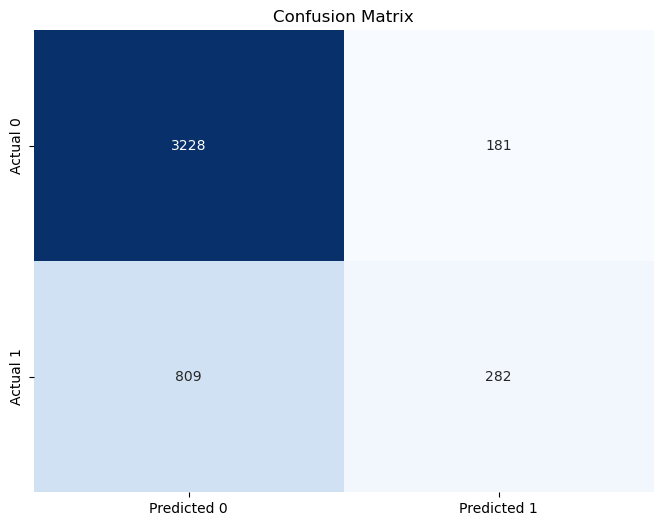

In [74]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification

# predictions (my_model) = model.predict(X_test)

# Creating a confusion matrix
cm = confusion_matrix(y_test, my_model)

# Ploting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

## Useful metrics
Accuracy: (TP + TN) / (TP + TN + FP + FN)
Precision: TP / (TP + FP)
Recall (Sensitivity): TP / (TP + FN)
Specificity: TN / (TN + FP)

In [80]:
TN = 3228
TP = 282
FN = 809
FP = 181

In [82]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy

0.78

In [83]:
Precision= TP / (TP + FP)
Precision

0.6090712742980562

Interpretation: Of all instances predicted as positive, 60.9%  were actually positive? High precision indicates fewer false positives.

In [84]:
Sensitivity = TP / (TP + FN)
Sensitivity

0.25847846012832265

Interpretation: Of all actual positive instances, 25.84%  were correctly predicted as positive? High recall indicates fewer false negatives.

In [85]:
Specificity = TN / (TN + FP)
Specificity

0.9469052508066882

Interpretation: Of all actual negative instances, 94.69% were correctly predicted as negative? High specificity indicates fewer false positives.

<h2 style="color:red" = > Calculating the FPR & FNR </h2>

False Positive Rate (FPR):

Formula: FP / (FP + TN)
Interpretation: Of all actual negative instances, how many were incorrectly predicted as positive?

False Negative Rate (FNR):

Formula: FN / (FN + TP)
Interpretation: Of all actual positive instances, how many were incorrectly predicted as negative?

In [86]:
FPR = FP / (FP + TN)
FPR

0.05309474919331182

In [87]:
FNR = FN / (FN + TP)
FNR

0.7415215398716773